<a href="https://colab.research.google.com/github/nathan-dnx/MLPROJECT/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXO 1**-------

Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
X shape: (150, 2)
y shape: (150,)
Target names: ['setosa' 'versicolor' 'virginica']
Unique target values: [0 1 2]
Number of samples per class: [50 50 50]


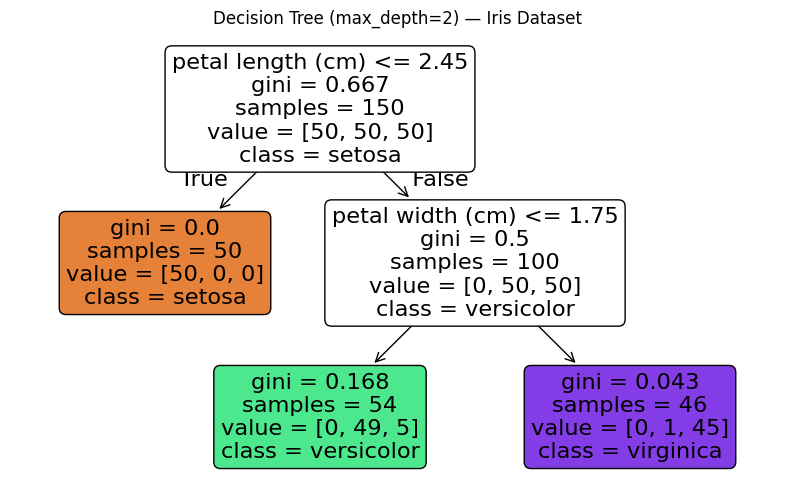

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
print("Dataset keys:", iris.keys())

import numpy as np

X = iris.data[:, 2:]   # columns 2 and 3 (petal length, petal width)
y = iris.target
print("X shape:", X.shape)
print("y shape:", y.shape)

print("Target names:", iris.target_names)
print("Unique target values:", np.unique(y))
print("Number of samples per class:", np.bincount(y))

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

from sklearn.tree import export_graphviz
import os

export_graphviz(
    tree_clf,
    out_file="Iris_DTree.dot",
    feature_names=iris.feature_names[2:],  # only petal features
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

os.system("dot -Tpng Iris_DTree.dot -o Iris_DTree.png")

!dot -Tpng Iris_DTree.dot -o Iris_DTree.png


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.title("Decision Tree (max_depth=2) — Iris Dataset")
plt.show()

6))
max_depth limits how deep the tree can grow.
It prevents overfitting by stopping further splits once the depth limit is reached.

Too small is underfitting (high bias).

Too large is overfitting (high variance).

max_depth=2 strikes a balance: simple, interpretable, yet accurate.



**EXO 2** ----



In [ ]:
p_root = np.array([50/150, 50/150, 50/150])
gini_root = 1 - np.sum(p_root**2)
print("Gini(root) =", round(gini_root, 3))

print("Feature used at root:",
      iris.feature_names[tree_clf.tree_.feature[0]])

import numpy as np

sample = np.array([[5.0, 1.5]])  # [petal length, petal width]
probs = tree_clf.predict_proba(sample)
print("Predicted probabilities [setosa, versicolor, virginica]:")
print(np.round(probs, 3))

predicted_class = tree_clf.predict(sample)
print("Predicted class index:", predicted_class[0])
print("Predicted class name:", iris.target_names[predicted_class][0])


Gini(root) = 0.667
Feature used at root: sepal length (cm)
Predicted probabilities [setosa, versicolor, virginica]:
[[0.    0.907 0.093]]
Predicted class index: 1
Predicted class name: versicolor


3)To understand this prediction:

The root node checks petal length ≤ 2.45.
→ Our sample has 5.0 → No, go to the right branch.

The next node checks petal width ≤ 1.75.
→ Our sample has 1.5 → Yes, go to the left branch.

This leaf node mainly contains versicolor samples (≈ 49 versicolor, 5 virginica),
which corresponds to probabilities of 0.907 and 0.093 respectively.

Hence, the model predicts versicolor as the most likely species.


  
4)Using predict(), the model outputs:

Predicted class index: 1

Predicted class name: versicolor

The result is consistent with the probability analysis and tree interpretation.

EXERCISE 3

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

def kfoldCrossValidation(X, y, M, k):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train model on this fold
        M.fit(X_train, y_train)

        # Predict on validation fold
        y_pred = M.predict(X_test)

        # Measure accuracy for this fold
        acc = accuracy_score(y_test, y_pred)
        scores.append(acc)

    return scores

scores = kfoldCrossValidation(X, y, tree_clf, k=5)
avg = np.mean(scores)
print("Fold accuracies:", scores)
print("Average accuracy:", avg)


from sklearn.tree import DecisionTreeClassifier

X = iris.data[:, 2:]   # petal length, petal width
y = iris.target
base_tree = DecisionTreeClassifier(max_depth=2, random_state=42)

for k in [3, 5, 10]:
    scores_k = kfoldCrossValidation(X, y, base_tree, k)
    avg_k = np.mean(scores_k)
    print(f"k = {k} -> fold accuracies = {np.round(scores_k, 3)}")
    print(f"          average accuracy = {avg_k:.3f}")

    # Model 1: shallow tree, only petal features, max_depth=2
tree_shallow = DecisionTreeClassifier(max_depth=2, random_state=42)
X_petal = iris.data[:, 2:]  # only petal length & width
y_all = iris.target

scores_shallow = kfoldCrossValidation(X_petal, y_all, tree_shallow, k=5)
avg_shallow = np.mean(scores_shallow)

print("Shallow tree (petal features only, max_depth=2):")
print("  fold accuracies:", np.round(scores_shallow, 3))
print("  average accuracy:", round(avg_shallow, 3))

# Model 2: full tree, all features, no depth limit
tree_full = DecisionTreeClassifier(random_state=42)  # no max_depth
X_full = iris.data  # all 4 features

scores_full = kfoldCrossValidation(X_full, y_all, tree_full, k=5)
avg_full = np.mean(scores_full)

print("\nFull tree (all features, no max_depth):")
print("  fold accuracies:", np.round(scores_full, 3))
print("  average accuracy:", round(avg_full, 3))


# The full-depth decision tree using all 4 features reaches an average accuracy of 0.953, compared to 0.947 for the shallow tree.
# This shows that allowing the tree to grow deeper and use all features typically improves accuracy, because the model can fit more complex decision boundaries.
# However, the risk is overfitting: an unconstrained decision tree may memorize the training data and might not generalize as well on completely new data outside the folds.

Fold accuracies: [0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]
Average accuracy: 0.9466666666666667
k = 3 -> fold accuracies = [0.98 0.92 0.92]
          average accuracy = 0.940
k = 5 -> fold accuracies = [0.967 0.967 0.933 0.933 0.933]
          average accuracy = 0.947
k = 10 -> fold accuracies = [1.    1.    1.    0.933 1.    0.867 0.867 1.    0.933 0.867]
          average accuracy = 0.947
Shallow tree (petal features only, max_depth=2):
  fold accuracies: [0.967 0.967 0.933 0.933 0.933]
  average accuracy: 0.947

Full tree (all features, no max_depth):
  fold accuracies: [1.    0.967 0.933 0.933 0.933]
  average accuracy: 0.953


4 )
As k increases, each fold becomes smaller, and the model is trained on a larger fraction of the dataset at each iteration.

With small k (e.g. k = 3), each test fold is large, so the score can vary more between folds depending on how "lucky" the split is. This gives a more noisy estimate.

With larger k (e.g. k = 10), we average over more folds, which tends to stabilize the estimate of the accuracy and reduce variance.

However, very large k (close to number of samples) makes each test fold tiny and can lead to high variance between folds and higher computation cost.

So there is a trade-off:

small k → faster but less stable estimate

moderate k (like 5 or 10) → more reliable generalization estimate

EXERCISE 4


In [ ]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# 1) Data (petal length & width only, as in Part I)
iris = load_iris()
X = iris.data[:, 2:]  # petal length, petal width
y = iris.target

# 2) Two trees with identical capacity, different impurity criteria
tree_gini    = DecisionTreeClassifier(criterion="gini",    max_depth=2, random_state=42)
tree_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=42)

# 3) Single train/test split (optional, for a quick look)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
tree_gini.fit(X_tr, y_tr)
tree_entropy.fit(X_tr, y_tr)

acc_gini_split    = accuracy_score(y_te, tree_gini.predict(X_te))
acc_entropy_split = accuracy_score(y_te, tree_entropy.predict(X_te))

print(f"[Hold-out] Accuracy (gini, depth=2):    {acc_gini_split:.3f}")
print(f"[Hold-out] Accuracy (entropy, depth=2): {acc_entropy_split:.3f}")

# 4) Stratified k-fold CV for a more robust comparison
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_acc_gini    = cross_val_score(tree_gini,    X, y, cv=cv, scoring="accuracy")
cv_acc_entropy = cross_val_score(tree_entropy, X, y, cv=cv, scoring="accuracy")

print("\n[CV=5] Accuracy (mean ± std)")
print(f"Gini:    {cv_acc_gini.mean():.3f} ± {cv_acc_gini.std():.3f}")
print(f"Entropy: {cv_acc_entropy.mean():.3f} ± {cv_acc_entropy.std():.3f}")

# 5) (Optional) Try without the depth limit to see if one criterion benefits more
tree_gini_full    = DecisionTreeClassifier(criterion="gini",    random_state=42)
tree_entropy_full = DecisionTreeClassifier(criterion="entropy", random_state=42)

cv_acc_gini_full    = cross_val_score(tree_gini_full,    X, y, cv=cv, scoring="accuracy")
cv_acc_entropy_full = cross_val_score(tree_entropy_full, X, y, cv=cv, scoring="accuracy")

print("\n[CV=5] Accuracy without depth limit (mean ± std)")
print(f"Gini (full):    {cv_acc_gini_full.mean():.3f} ± {cv_acc_gini_full.std():.3f}")
print(f"Entropy (full): {cv_acc_entropy_full.mean():.3f} ± {cv_acc_entropy_full.std():.3f}")

# 6) Summary dict (easy to paste in your report)
summary = pd.DataFrame({
    "Model": ["Gini (depth=2)", "Entropy (depth=2)", "Gini (full)", "Entropy (full)"],
    "CV5_Accuracy_Mean": [cv_acc_gini.mean(), cv_acc_entropy.mean(),
                          cv_acc_gini_full.mean(), cv_acc_entropy_full.mean()],
    "CV5_Accuracy_Std":  [cv_acc_gini.std(),  cv_acc_entropy.std(),
                          cv_acc_gini_full.std(),  cv_acc_entropy_full.std()]
})
print("\nSummary:\n", summary.round(3))

[Hold-out] Accuracy (gini, depth=2):    0.933
[Hold-out] Accuracy (entropy, depth=2): 0.933

[CV=5] Accuracy (mean ± std)
Gini:    0.940 ± 0.025
Entropy: 0.940 ± 0.025

[CV=5] Accuracy without depth limit (mean ± std)
Gini (full):    0.953 ± 0.016
Entropy (full): 0.953 ± 0.016

Summary:
                Model  CV5_Accuracy_Mean  CV5_Accuracy_Std
0     Gini (depth=2)              0.940             0.025
1  Entropy (depth=2)              0.940             0.025
2        Gini (full)              0.953             0.016
3     Entropy (full)              0.953             0.016


With the same depth and features, Gini and Entropy usually give very similar accuracy on Iris (differences come from tiny threshold changes).

Cross-validation confirms there’s no consistent winner; both criteria rank splits similarly in practice.

Removing the depth limit can slightly change the ranking, but on Iris (easy, well-separated by petal features) the gap remains small.

Conclusion: choose either criterion; prefer Gini for speed or Entropy if you like the information-theoretic interpretation — performance is comparable.

PCA ON IRIS



Explained variance ratio (PC1..PC4): [0.7296 0.2285 0.0367 0.0052]
Cumulative: [0.7296 0.9581 0.9948 1.    ]


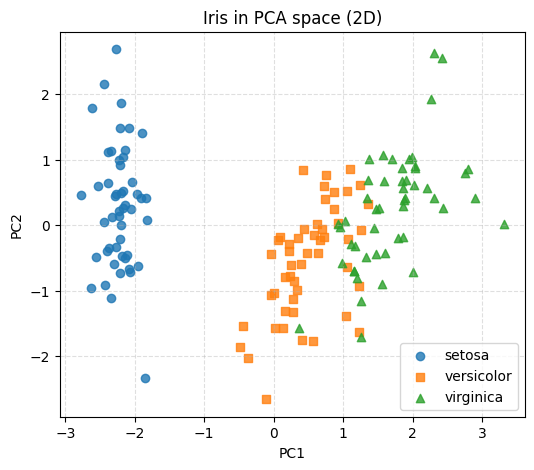

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



LogReg (no PCA)  — CV Accuracy: mean=0.953 ± 0.045
LogReg (PCA 2D) — CV Accuracy: mean=0.913 ± 0.045
Decision Tree (on PCA 2D) — CV Accuracy: mean=0.900 ± 0.047


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 1) Data
iris = load_iris()
X = iris.data          # all 4 features
y = iris.target        # 3 classes

# 2) Standardize (important for PCA)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 3) Fit PCA (all comps), inspect explained variance
pca_full = PCA(n_components=4, random_state=42)
X_pca_full = pca_full.fit_transform(X_std)

print("Explained variance ratio (PC1..PC4):", np.round(pca_full.explained_variance_ratio_, 4))
print("Cumulative:", np.round(np.cumsum(pca_full.explained_variance_ratio_), 4))

# 4) 2D projection for visualization
pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_std)

plt.figure(figsize=(6,5))
for cls, name, marker in zip([0,1,2], iris.target_names, ['o','s','^']):
    idx = (y == cls)
    plt.scatter(X_pca2[idx, 0], X_pca2[idx, 1], label=name, alpha=0.8, marker=marker)
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("Iris in PCA space (2D)")
plt.legend(); plt.grid(True, ls="--", alpha=0.4)
plt.show()

# 5) Compare models — Logistic Regression with/without PCA (CV)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logreg_no_pca = LogisticRegression(max_iter=2000, multi_class="auto")
acc_no_pca = cross_val_score(logreg_no_pca, X_std, y, cv=cv, scoring="accuracy")

logreg_pca2 = LogisticRegression(max_iter=2000, multi_class="auto")
acc_pca2 = cross_val_score(logreg_pca2, X_pca2, y, cv=cv, scoring="accuracy")

print("\nLogReg (no PCA)  — CV Accuracy: mean={:.3f} ± {:.3f}".format(acc_no_pca.mean(), acc_no_pca.std()))
print("LogReg (PCA 2D) — CV Accuracy: mean={:.3f} ± {:.3f}".format(acc_pca2.mean(), acc_pca2.std()))

# 6) (Bonus) Decision Tree vs LogReg in PCA space
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
acc_tree = cross_val_score(tree, X_pca2, y, cv=cv, scoring="accuracy")
print("Decision Tree (on PCA 2D) — CV Accuracy: mean={:.3f} ± {:.3f}".format(acc_tree.mean(), acc_tree.std()))